### Basic moments of one-dimensional data

In [1]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import math

In [2]:
def median(data):
    data_array = data.values
    sorted_data = sorted(data_array)
    if len(sorted_data)%2 != 0:
        n = int((len(sorted_data) + 1)/2)
        median = sorted_data[n-1]
    else:
        n1 = int(len(sorted_data)/2)
        n2 = int(len(sorted_data)/2 + 1)
        median = (sorted_data[n1-1] + sorted_data[n2-1])/2
    return median

In [3]:
def mode(data):
    data_array = data.values
    mode = stats.mode(data_array)
    return mode

In [4]:
def mean(data):
    data_array = data.values
    n = len(data_array)
    summation = 0
    for i in data_array:
        summation += i
    mean = summation/n
    return mean 

In [5]:
def sample_variance(data):
    data_array = data.values
    n = len(data_array)
    mean_array = mean(data)
    summation = 0
    for i in data_array:
        summation += (i - mean_array)**2
    sample_variance = summation/(n-1)
    return sample_variance

In [6]:
def standard_deviation(data):
    data_array = data.values
    n = len(data_array)
    mean_array = mean(data)
    summation = 0
    for i in data_array:
        summation += (i - mean_array)**2
    variance = summation/(n)
    std_dev = math.sqrt(variance)
    return std_dev

In [7]:
data1 = pd.read_csv('data1.txt', header = None)
data2 = pd.read_csv('data2.txt', header = None)
data3 = pd.read_csv('data3.txt', header = None)
data4 = pd.read_csv('data4.txt', header = None)
data5 = pd.read_csv('data5.txt', header = None)

In [8]:
# For mode
sorted_data = data1[0].tolist()
counter = []
for i in sorted_data:
    count = sorted_data.count(i)
    counter += [count]

In [9]:
data1_median = median(data1)
data2_median = median(data2)
data3_median = median(data3)
data4_median = median(data4)
data5_median = median(data5)

In [10]:
data1_mean = mean(data1)
data2_mean = mean(data2)
data3_mean = mean(data3)
data4_mean = mean(data4)
data5_mean = mean(data5)

In [11]:
data1_mode = mode(data1)
data2_mode = mode(data2)
data3_mode = mode(data3)
data4_mode = mode(data4)
data5_mode = mode(data5)

In [12]:
data1_sample_variance = sample_variance(data1)
data2_sample_variance = sample_variance(data2)
data3_sample_variance = sample_variance(data3)
data4_sample_variance = sample_variance(data4)
data5_sample_variance = sample_variance(data5)

In [13]:
data1_standard_deviation = standard_deviation(data1)
data2_standard_deviation = standard_deviation(data2)
data3_standard_deviation = standard_deviation(data3)
data4_standard_deviation = standard_deviation(data4)
data5_standard_deviation = standard_deviation(data5)

In [14]:
import matplotlib.pyplot as plt

In [15]:
def plot(data):
    plt.scatter(data, [0]*len(data))
def histogram(data):
    n_bins = 20
    plt.hist(data)

# Data1

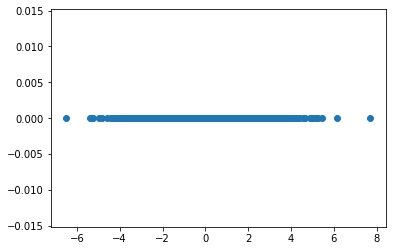

In [16]:
plot(data1)

[0.05060122]
1.9574524154947086


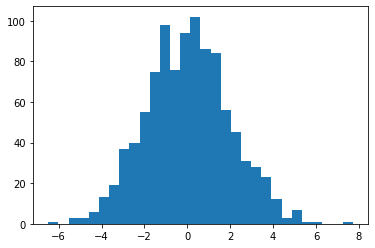

In [17]:
plt.hist(data1.values, bins = 30)
print(median(data1))
print(standard_deviation(data1))

# Data2

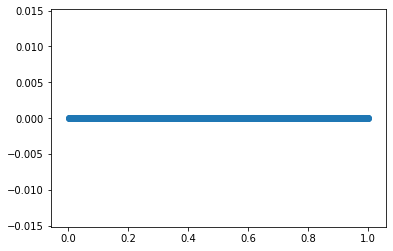

In [18]:
plot(data2)

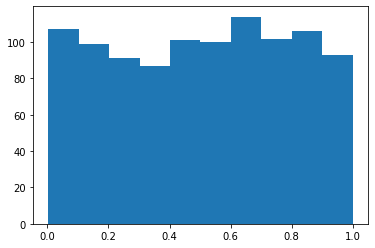

In [19]:
histogram(data2.values)

# Data3

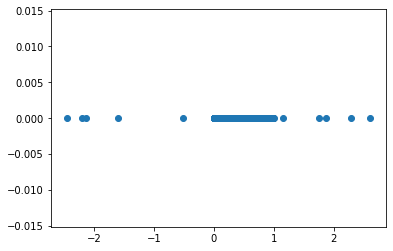

In [20]:
plot(data3)

array([0.49038162])

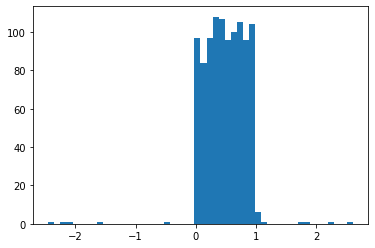

In [42]:
n_bins = 50
plt.hist(data3.values, bins = n_bins)
mean(data3)

# Data4

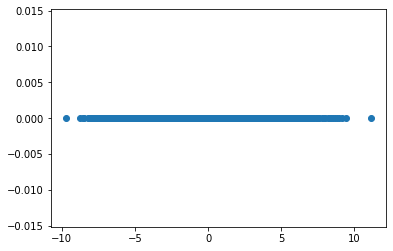

In [22]:
plot(data4)

array([-0.01027337])

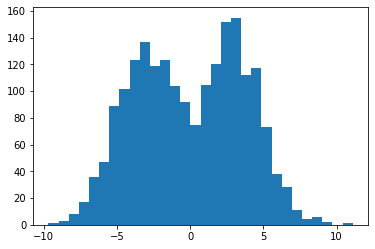

In [43]:
# Mixture  of gaussians are found in the distribution
plt.hist(data4.values, bins = 30)
mean(data4)

# Data5

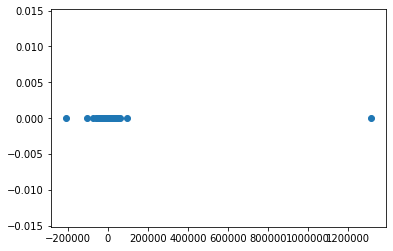

In [24]:
plot(data5)

median is  [-0.00049745]
standard deviation is 1356.5369135582896


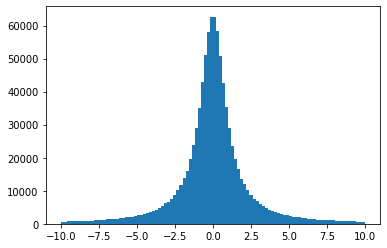

In [25]:
plt.hist(data5.values, range = (-10,10), bins = 100)
print('median is ',median(data5))
print('standard deviation is', standard_deviation(data5))

In [27]:
# 1. Data1 distribution is Normal distribution, with mean and variance
# MLE of mean is sample mean
# MLE of variance is sample variance*(n-1)/n which is a biased estimator
mean_MLE = mean(data1)
n = len(data1)
variance_MLE = sample_variance(data1)*(n-1)/n

In [52]:
# 2. Data2, distribution is uniform distribution, whose parameters are max and min of the given values
# MLE is max(data2) and min(data2). 
MLE_a = np.min(data2)[0]
MLE_b = np.max(data2)[0]

In [51]:
np.max(data2)[0]

0.9994137257706665

In [53]:
np.min(data2)[0]

0.0032182636042786816

In [54]:
# -z <= z-statistic <= z
# For 95% confidence interval z value is 1.96

max_confidence_interval = (2/math.sqrt(len(data1)))*1.96 + mean(data1)
min_confidence_interval = -(2/math.sqrt(len(data1)))*1.96 + mean(data1)
print('Confidence interval is', min_confidence_interval,'<=','sample_mean <=', max_confidence_interval)

Confidence interval is [-0.08529717] <= sample_mean <= [0.1626254]


### Exercise

### Feature visualisation and selection

In [31]:
two_dim_data = pd.read_csv('twodimdata.csv')

In [32]:
two_dim_data.head()

x1        x2
0 -1.686800  0.001299
1 -0.715651  0.000235
2 -0.695645 -0.000706
3 -0.233415 -0.001146
4 -0.014929  0.002093

In [33]:
two_dim_data.corr(method ='pearson')

x1        x2
x1  1.000000 -0.002033
x2 -0.002033  1.000000

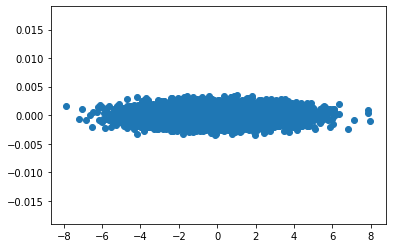

In [55]:
plt.scatter(two_dim_data.x1, two_dim_data.x2)